In [14]:
import pandas as pd
import numpy as np

In [16]:
#数据预处理
data = pd.read_csv("F:/Python/部分机器学习代码/1.线性判别分析LDA/dataset/breast-cancer.csv")   #path to your file
#print(data.head())
data = data.drop(['id'], axis=1)  #删除标识符列
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  #将 diagnosis 标签列转换为数值
#print(data.isnull().sum())  #检查是否有缺失值

In [17]:
#将数据的70%作为训练集，30%作为测试集
num_data = data['diagnosis'].size
#print(num_data)
sample = data.iloc[:400, :]  #训练集
test = data.iloc[400:, :]  #测试集

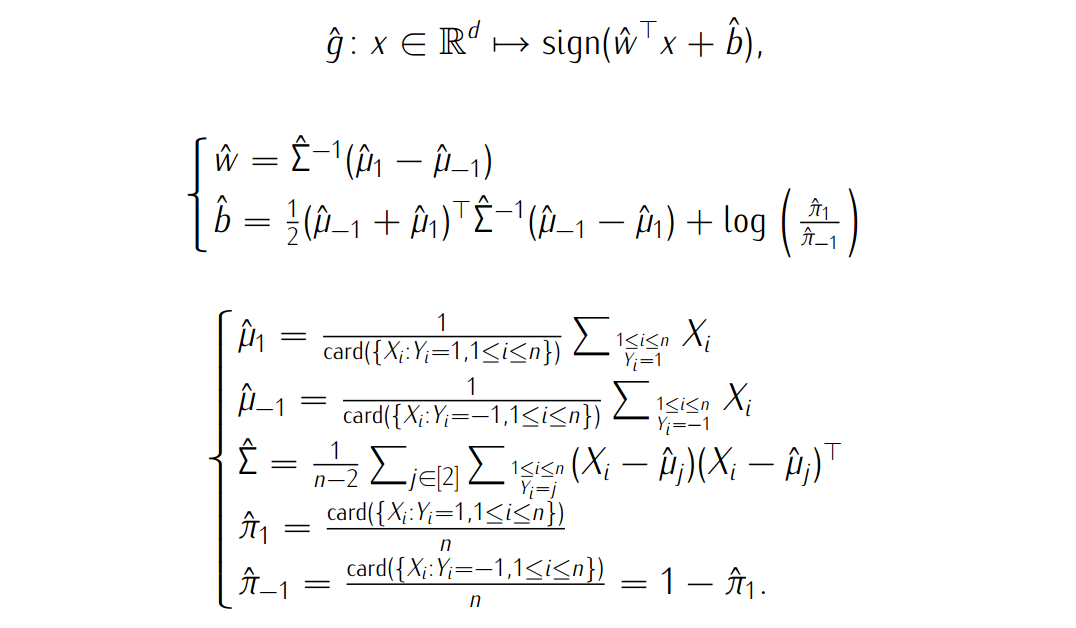

In [18]:
#求贝叶斯分类器
sample_lable_1 = sample[sample['diagnosis'] == 1]
sample_lable_0 = sample[sample['diagnosis'] == 0]
sample_feature_1 = sample_lable_1.drop(['diagnosis'],axis=1)
sample_feature_0 = sample_lable_0.drop(['diagnosis'],axis=1)
mu_1 = sample_feature_1.mean().to_numpy()
mu_0 = sample_feature_0.mean().to_numpy()
x1 = sample_feature_1.to_numpy()
x0 = sample_feature_0.to_numpy()
sigma = (((x1-mu_1).T @ (x1-mu_1)) + ((x0-mu_0).T @ (x0-mu_0)))/(num_data - 2)
num1 = sample_lable_1.shape[0]
pi_1 = num1 / num_data
pi_0 = 1 - pi_1

w = np.linalg.inv(sigma) @ (mu_1 - mu_0)
b = 0.5 * (mu_0 + mu_1).T @ np.linalg.inv(sigma) @ (mu_0 - mu_1) + np.log(pi_1/pi_0)

In [19]:
#定义贝叶斯分类器
def Bayes_Classifier_LDA(X, w = w, b = b):
    if X.ndim == 1:
        return int(w @ X + b >= 0)
    elif X.ndim == 2:
        return (w @ X + b >= 0).astype(int)

In [20]:
#在测试集上检测
x_test = test.drop(['diagnosis'],axis=1).to_numpy().T
true_label = test['diagnosis'].to_numpy()
pred_label = Bayes_Classifier_LDA(x_test)
diff = np.array(pred_label - true_label)
err_abs = np.sum(np.abs(diff)) 
err = err_abs / (np.size(diff))
print("测试集总数：", np.size(diff))
print("估计错误的数量：", err_abs)
print("估计错误的比例：", err)
print(f"准确率：{(1-err)*100:.2f}%")

测试集总数： 169
估计错误的数量： 4
估计错误的比例： 0.023668639053254437
准确率：97.63%


In [8]:
#使用sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [6]:
#数据预处理
data = pd.read_csv("F:/Python/部分机器学习代码/1.线性判别分析LDA/dataset/breast-cancer.csv")
data = data.drop(['id'], axis=1)  #删除标识符列
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  #将 diagnosis 标签列转换为数值
data_label = data['diagnosis']
data_feature = data.drop(['diagnosis'],axis=1)

In [23]:
#使用sklearn对模型进行处理
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_label, test_size=0.3, random_state=22)  #划分数据
lda = LinearDiscriminantAnalysis()  #创建模型
lda.fit(X_train, y_train)  #进行训练
y_pred = lda.predict(X_test)  #预测
accuracy = accuracy_score(y_test, y_pred)  #计算准确率
print(f'LDA 分类准确率: {accuracy * 100:.2f}%')

LDA 分类准确率: 93.57%
